# Tips Dataset Explored


![Image of Tipping jar](https://yourfriendlyneighborhoodbarista.files.wordpress.com/2010/12/tips.jpg)

[Image]

[Image]: https://yourfriendlyneighborhoodbarista.files.wordpress.com/2010/12/tips.jpg


### Fundamentals of Data Analysis Assessment 2019

In [108]:
# Importing the required libraries and use abbreviations
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") # Added this code at the end, to get rid of a few red warnings, and make the notebook more visually attractive.
# https://exploredatalab.com/how-to-suppress-warnings-in-jupyter-notebook/

In [2]:
# Import the tips dataset we will be working with
tips = sns.load_dataset("tips")

## Part 1: Tips Dataset Described

First, let's have a look at the dataset we will be looking into:

In [3]:
# display the first 5 rows of the tips dataset
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.tail() # display the last 5 rows of the tips dataset

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


First of all, the last few entries look perfect, so it seems there is no missing data. The dataset consists of 244 rows and 7 columns. 244 people (and their party) have enjoyed food and drinks in a restaurant and paid their bill. This dataset shows us the size of their tip, and 6 other variables. 

In [5]:
# This function quickly shows an overview of the numeric variables in the dataset
tips.describe()
# Learned about describe function here: https://web.microsoftstream.com/video/ecc9ce4a-c6f5-4c50-a4f4-29116fc21b81?

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


What do these rows mean?

- **count**: this is the total amount of rows.
- **mean**: also called the average. This is the number you get when adding up all data in a certain column (e.g. all tips) and divide it by the count. A dataset is usually spread around the mean, so this value is crucial.
- **std**: Standarddeviation is a way to measure the spread of a dataset. A low std indicates that values are close to the mean, whereas a high std indicated big variation in the values, in which case it's important to look at the median (middle value) as well.
- **min**: smallest value
- **25%**: 25% of values in the column are lower, and 75% higher than this value.
- **50%**: also called median, 50% of values is lower and 50% higher than this value.
- **75%**: 75% of values in the column are lower, 25% higher than this value.
- **max**: biggest value

Panda's <em>describe</em> function, quickly gives us an idea of a dataset. The mean (average) total bill appears to be just under 20 dollars and the mean tip about 3 dollars. The median total bill and tip are both fairly close to the mean, which would suggest a fairly symmetrical distribution. The biggest tip was 10 dollars, and the smallest tip 1 dollar. Interesting to note is the fact that every single person who paid their bill, also gave a tip. This might be normal in the US, but this probably would not be the case over here in Ireland. Anyway, let's have a closer look at the dataset and it's variables.

**Total_bill** is a float, which tells us the total bill that was to be paid. Total_bill ranges from a minimum of 3.07 dollars to a maximum of 50.81 dollars, with a mean of 19.78 dollars. Let's visualize the data for this variable with a plot:

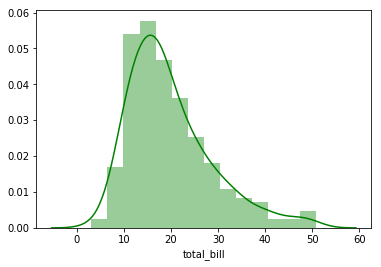

In [6]:
# Plot a distplot of variable total_bill in green. This kind of plot is useful when you only want to visualize one numeric variable.
sns.distplot(tips["total_bill"], color="g");

As you can see, the vast majority of <em> total bills </em> centres around the mean of 19.78 dollars.

The variable called **tips** shows what size tip was left when paying the bill. The smallest tip was 1 dollar, while the biggest one was 10 dollars. The mean(average) tip was 2.99 dollars, with a median of 2.9.

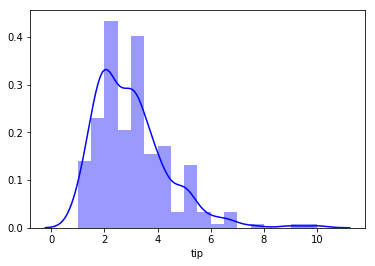

In [7]:
# Plot a distplot of variable total_bill in blue
sns.distplot(tips["tip"], color="b");

When looking at the plot for the <em>tip</em> variable, again we can see that most values centre around the mean of 2.99.

The **sex** variable tells us whether the person who paid was male or female. This variable only has 2 possible values.

In [8]:
# First I read in the raw dataset as "df" to start extracting date from the set.
df = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/tips.csv")
# Count the total amount of male tippers, by looking at the "sex" column and only using the rows with "male".
print ("Total amount of male tippers = ", df.sex[df.sex == "Male"].count()) # https://stackoverflow.com/questions/35277075/python-pandas-counting-the-occurrences-of-a-specific-value
# Count all female tippers
print ("Total amount of females tippers = ", df.sex[df.sex == "Female"].count())

Total amount of male tippers =  157
Total amount of females tippers =  87


The third variable that was recorded is if there was a **smoker** at the table. This variable again can only have 2 values: yes or no.

In [9]:
# Count the total amount of smokers and non-smokers
print ("Total amount of smoking tippers = ", df.smoker[df.smoker == "Yes"].count())
print ("Total amount of non-smoking tippers = ", df.smoker[df.smoker == "No"].count())

Total amount of smoking tippers =  93
Total amount of non-smoking tippers =  151


The **day** variable shows us what day of the week it was when the tip was given. The only days mentioned here are Thursday, Friday, Saturday and Sunday. The restaurant might have been closed the other 3 days, or perhaps there was no data collection on the those days. Let's visualize how often each day is represented in the tips dataset:

In [10]:
# Count the amount of bills paid for all of the 4 different days
print ("Total amount of bills paid on Thursdays in this dataset = ", df.day[df.day == "Thur"].count()) # https://stackoverflow.com/questions/35277075/python-pandas-counting-the-occurrences-of-a-specific-value
print ("Total amount of bills paid on Fridays in this dataset = ", df.day[df.day == "Fri"].count())
print ("Total amount of bills paid on Saturdays in this dataset = ", df.day[df.day == "Sat"].count())
print ("Total amount of bills paid on Sundays in this dataset = ", df.day[df.day == "Sun"].count())

Total amount of bills paid on Thursdays in this dataset =  62
Total amount of bills paid on Fridays in this dataset =  19
Total amount of bills paid on Saturdays in this dataset =  87
Total amount of bills paid on Sundays in this dataset =  76


In [11]:
# Setting names for the total count of every day, to use in a pie plot
Thursdays = df.day[df.day == "Thur"].count() # 
Fridays = df.day[df.day == "Fri"].count()
Saturdays = df.day[df.day == "Sat"].count()
Sundays = df.day[df.day == "Sun"].count()

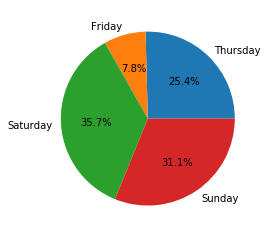

In [12]:
# Set labels for the pie plot
a = ([Thursdays, Fridays, Saturdays, Sundays])
labels = "Thursday", "Friday", "Saturday", "Sunday" 
# Plot a pie plot, round the percentages at 1 decimal to make it more readable.
plt.pie(a,labels = labels, autopct ="%1.1f%%");
#learned about pie plot here: https://pythonspot.com/matplotlib-pie-chart/

What is striking is the low number of bills paid on Fridays. Even Thursdays are much busier.

The **time** variable tells us if it was a lunch or a dinner that was paid for. Again, only 2 possible values here.

In [13]:
# Count the amount of lunches and dinners that were had.
print ("Amount of lunch tips = ", df.time[df.time == "Lunch"].count())
print ("Amount of dinner tips = ", df.time[df.time == "Dinner"].count())

Amount of lunch tips =  68
Amount of dinner tips =  176


And lastly, **size** tells us the size of the party for which the person was paying. As can be seen in the array below: the smallest value here is 1, while the biggest party consisted of 6 people, and the mean is 2.57.

In [14]:
# Count the frequency that every different party size occurs in the dataset.
partysize = df['size'].value_counts(); # https://stackoverflow.com/questions/22391433/count-the-frequency-that-a-value-occurs-in-a-dataframe-column/36434248

In [15]:
partysize

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64

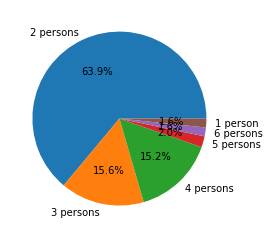

In [16]:
labels = "2 persons", "3 persons", "4 persons", "5 persons", "6 persons", "1 person" # Set the labels for the pie plot
plt.pie(partysize, labels = labels, autopct ="%1.1f%%"); # Plot a pie plot, round the percentages at 1 decimal to make it easily readable.

By far the most common size of the party was 2, followed by 3 and 4. Parties of 1,5 and 6 were rare.

Before I start looking into the correlations between the different variables. Let's first have a bit of fun with this dataset:

In [17]:
# Show the maximum size, tip and total_bill for every day and seperate for gender.
tips.groupby(["sex", "day"]).max() # https://www.geeksforgeeks.org/pandas-groupby/

size    tip  total_bill
sex    day                          
Male   Thur     6   6.70       41.19
       Fri      4   4.73       40.17
       Sat      5  10.00       50.81
       Sun      6   6.50       48.17
Female Thur     6   5.17       43.11
       Fri      3   4.30       22.75
       Sat      4   6.50       44.30
       Sun      5   5.20       35.26

Above table shows the maximum tip that was given by males and females, on all 4 days.

In [18]:
tips.groupby(["sex", "day"]).min() # Show the minimum size, tip and total_bill for every day and seperate for gender

size   tip  total_bill
sex    day                         
Male   Thur     2  1.44        7.51
       Fri      1  1.50        8.58
       Sat      2  1.00        7.74
       Sun      2  1.32        7.25
Female Thur     1  1.25        8.35
       Fri      2  1.00        5.75
       Sat      1  1.00        3.07
       Sun      2  1.01        9.60

This table shows the minimum tip given per day, per sex.

In [19]:
# Add up all total bills, tips and sizes per sex and day of the week
tips.groupby(["sex", "day"]).sum()

total_bill     tip  size
sex    day                           
Male   Thur      561.44   89.41    73
       Fri       198.57   26.93    21
       Sat      1227.35  181.95   156
       Sun      1269.46  186.78   163
Female Thur      534.89   82.42    79
       Fri       127.31   25.03    19
       Sat       551.05   78.45    63
       Sun       357.70   60.61    53

Here we can see the total amount spent in the restaurant per day and per sex. Notice how much more money males are bringing in over the weekend, both in <em>total_bill</em> as in <em>tip</em>. Also we can see the total amount of people that came to the restaurant per day. The weekend turns out to be much busier than the weekdays. Women seem relatively to be much more likely to be bill payers on Thursdays, especially when compared to Sundays. Reasons for this is something I will look into later.

All in all, this is a potentially interesting dataset. In my opinion, it could have been even better if they had asked the people paying how they would rate the service. Then we could have investigated if there is a correlation between tip size and service provided; something I believe is not as obvious as people might think it is. Anyway, this is for another time. Let's now focus on possible correlations between the variables used in this dataset.

## Part 2: Possible relationship between total bill and tip

### 2.1 Correlation between total bill and tip

In this part I am going to have a look at the possible relationship between the total bill and the tip that was left. To do this I will visualise the relationship and explain in detail how the two variables are (possibly) related.

Below is a scatterplot with the total bill on the x-axis, and the tip size on the y-axis.

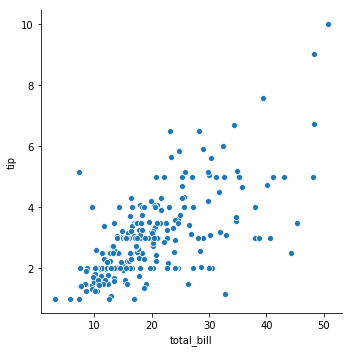

In [20]:
# Plot a relplot using dots (scatterplot). Great for showing relationships between variables. https://seaborn.pydata.org/generated/seaborn.relplot.html
sns.relplot(x="total_bill", y="tip", data=tips);

This scatterplot gives us a first idea of what the relationship might be. It looks like, on average, the higher the bill, the higher the tip will be. This is because, the further to the right of the x-axis you look, the higher the dots are on the y-axis. Of course there are some exceptions, but the correlation seems to be pretty strong.

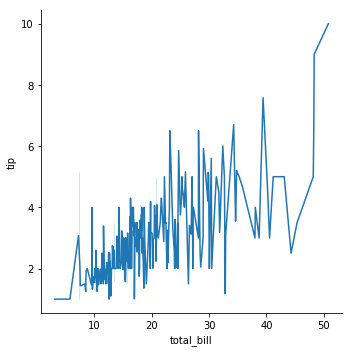

In [21]:
# Plot a relplot with a line instead of dots.
sns.relplot(x="total_bill", y="tip", kind="line", data=tips);

The above lineplot, while clearly not as suitable as the scatterplot, still shows us in the blink of an eye, the trend of the higher the bill, the higher the tip.

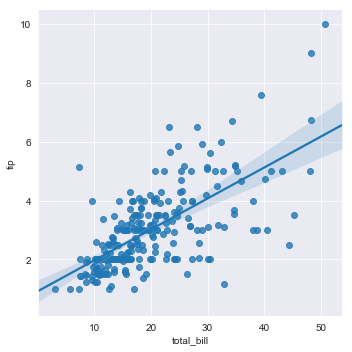

In [22]:
# plot a lmplot, which shows the regression model as well as the dots.
sns.set_style('darkgrid') 
sns.lmplot(x ='total_bill', y ='tip', data = tips); # https://seaborn.pydata.org/generated/seaborn.lmplot.html

In the lmplot above the regression model is visible as well as the scattered dots. The <em>best fit line</em> emphasizes again the strong relationship between x (total_bill) and y (tip).

Is there a formula we can use to predict the value for <em> tip</em> when we know the value for <em>total_bill</em>?
We can use the polyfit function that is built into numpy to find the least square polynomial fit. The line in the lmplot above is generated using these values.

In [23]:
# Calculate the values of the 'best fit line'. 
np.polyfit(df["total_bill"], df["tip"], 1) # Learned about polyfit in Ian McLoughlins videolecture: https://web.microsoftstream.com/video/021a0f49-a019-4119-a08c-7601a9a7d0b5
# Found further instructions as to how to use the polyfit function here: https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html

array([0.10502452, 0.92026961])

So with the date we have, it follows that the best way to predict the tip, is to multiply the total bill by 0.10502452 and add 0.92026961. This is the best approximation only if we lack any further predictive data, which we actually do have. So these numbers would change if we included day of the week or smokers for instance.

I am now going to divide the <em> tips </em> dataset into 3 subsets. These subsets are: **lowbills** from 0 to 13 dollar, **avgbills**, from 13.01 till 19 dollars, and **bigbills**, higher than 19 dollars. After looking at the correlation between the total bill and the tip size, I want to have a look at the possible correlation between total bill and tip percentage. 

To do this, I will generate a new dataframe **billtip** with added variable <em>tip_percentage</em>. 

In [24]:
# Use the tips dataset we called df earlier, and rename it to billtip. I will add an extra column so I want to use a new name.
billtip = df

In [25]:
# Adding a new column with tip_percentage, which I will use later. 
# Divide tip by total bill to get the tip percentage
billtip["tip_percentage"] = (billtip["tip"]/billtip["total_bill"] *100)
# Used this link to learn how to divide columns: https://stackoverflow.com/questions/36619631/how-to-divide-two-column-in-a-dataframe

In [26]:
# Show the data in billtip, including the new column "tip_percentage"
billtip

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
5,25.29,4.71,Male,No,Sun,Dinner,4,18.623962
6,8.77,2.00,Male,No,Sun,Dinner,2,22.805017
7,26.88,3.12,Male,No,Sun,Dinner,4,11.607143
8,15.04,1.96,Male,No,Sun,Dinner,2,13.031915
9,14.78,3.23,Male,No,Sun,Dinner,2,21.853857


In [27]:
# Use the <em>between</em> function to select only the **lowbills** between 0 and 12 dollars. 
# I used this link to learn about this: https://stackoverflow.com/questions/31617845/how-to-select-rows-in-a-dataframe-between-two-values-in-python-pandas/40442778
lowbills = billtip[df['total_bill'].between(0, 12)]

In [28]:
# The second subset of data consists of the "avgbills" between 12.01 (to prevent possible overlap with group 1) and 24 dollar.
avgbills = billtip[df['total_bill'].between(12.01, 24)]

In [29]:
# And the last subset "bigbills" consists of all bills higher than 24 dollar.
bigbills = billtip[df['total_bill'].between(24.01, 51)] # in tips.describe I could see the max bill was just over 50 dollars, so I can use 51 as the highest value.

Let's visualize these 3 datasets: 

Text(0.5, 1.0, 'Bills higher than 24 dollars')

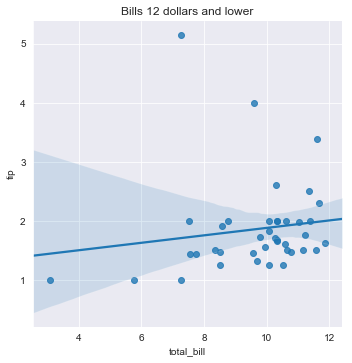

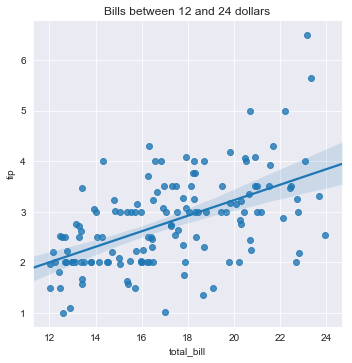

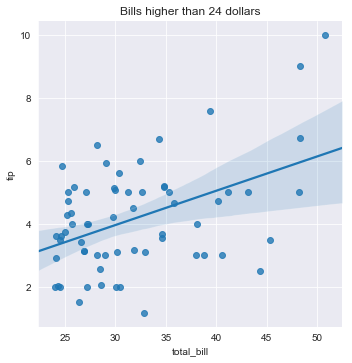

In [30]:
# Plot 3 lmplots to see the correlation between total_bill and tip for all 3 bill groups seperately.
sns.lmplot(x="total_bill", y="tip", data=lowbills)
plt.title("Bills 12 dollars and lower") # Learned about giving titles to plot in seaborn here: https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot
sns.lmplot(x="total_bill", y="tip", data=avgbills)
plt.title("Bills between 12 and 24 dollars")
sns.lmplot(x="total_bill", y="tip", data=bigbills)
plt.title("Bills higher than 24 dollars")


Looking at these lmplots, and the <em>best fit line</em>, again there is a clear correlation, in every category, between <em>total_bill</em> and <em>tip</em>. The correlation is strongest in <em>avgbills</em> and <em>bigbills</em>. The blue line is the indicator of the correlation and the steeper, the stronger the correlation between x and y. This was to be expected of course, so now I want to know if there is also a correlation between the <em>total_bill</em> and the <em>tip_percentage</em>.

### 2.2 Correlation between total bill and tip percentage

In [31]:
billtip.describe()

,total_bill,tip,size,tip_percentage
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,16.080258
std,8.902412,1.383638,0.951100,6.107220
min,3.070000,1.000000,1.000000,3.563814
25%,13.347500,2.000000,2.000000,12.912736
50%,17.795000,2.900000,2.000000,15.476977
75%,24.127500,3.562500,3.000000,19.147549
max,50.810000,10.000000,6.000000,71.034483


Before I look for possible correlations, I first want to have a look at the data in the <em>tip_percentage</em> column. A few things stand out. The mean and the median are very close, which shows me this variable probably has a pretty symmetrical distribution. However, there is a maximum tip of 71 percent, which, with a mean of 16, seems very extreme. Let's plot the data and see what else we can find out.

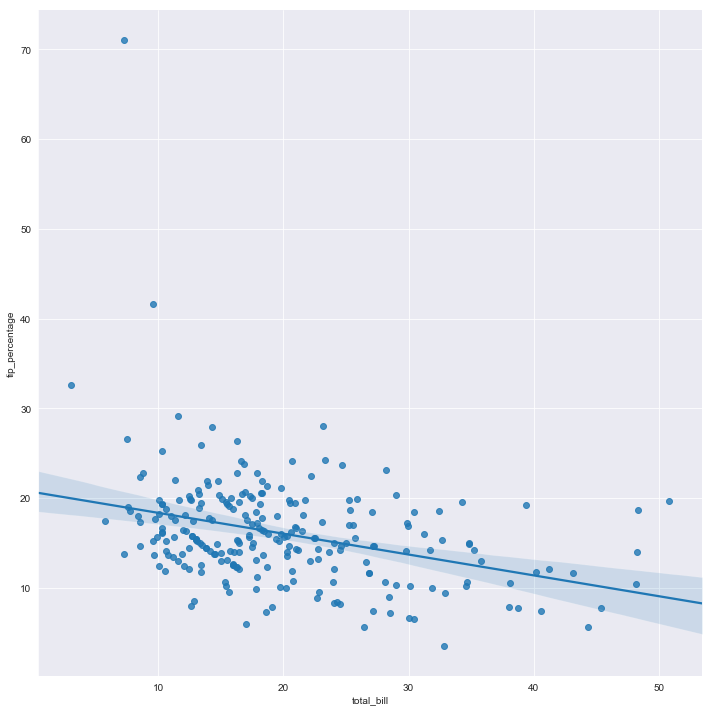

In [109]:
# Plot an lmplot to see correlation between total_bill and tip_percentage.
sns.lmplot(x="total_bill", y="tip_percentage", data=billtip, size=10);

The scatterplot shown above shows us the possible correlation between <em>total bill</em> and <em>tip percentage</em>. 
There seems to be a small negative correlation. The tips get relatively smaller as the bills get bigger. The value of 71 percent seems to be a complete exception and I won't give it much more attention.

Let's have a look at the possible correlation between <em>total bill</em> and <em>tip percentage</em> for each of the 3 groups of data I created from the main tips dataset.

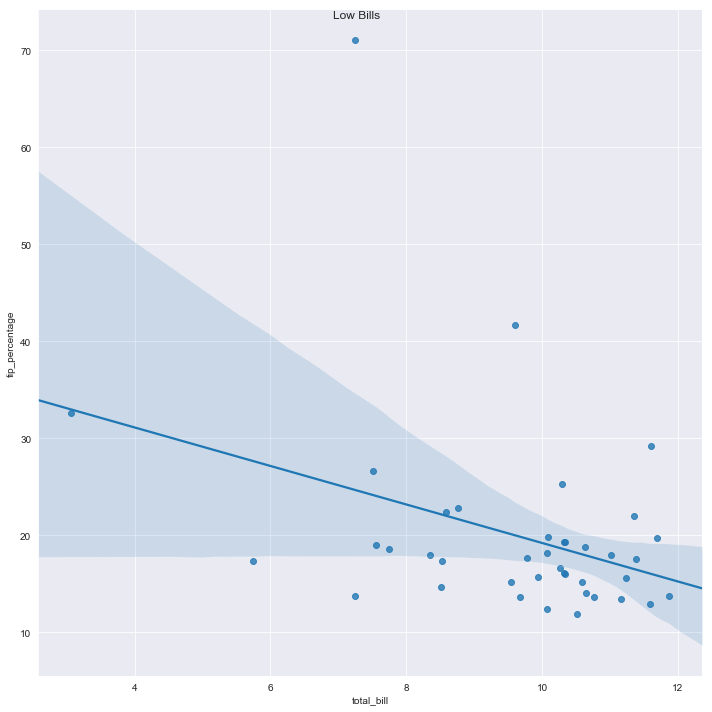

In [110]:
# Plot lmplot to see correlation between total_bill and tip_percentage for "lowbills"
a = sns.lmplot(x="total_bill", y="tip_percentage", data=lowbills, size=10)
a.fig.suptitle("Low Bills"); # Learned how to set a title here: https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot

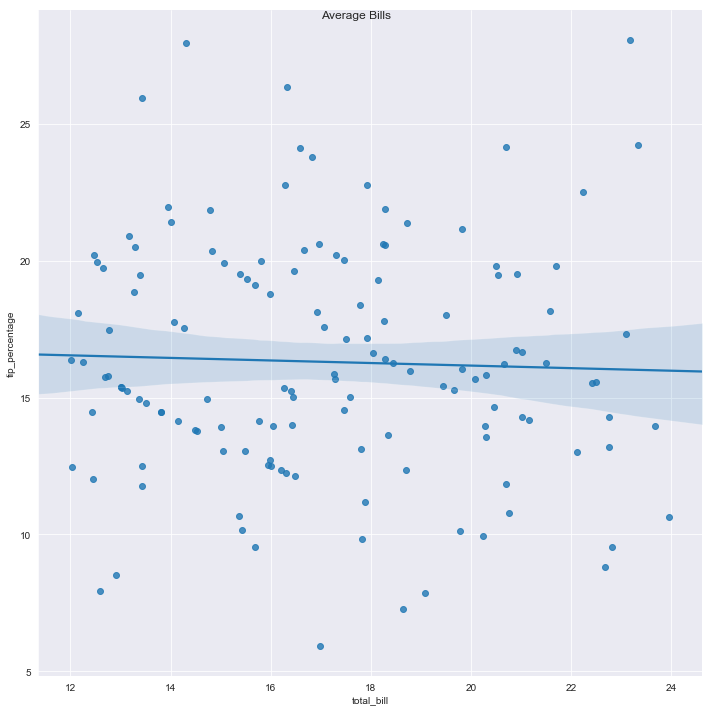

In [111]:
# Plot lmplot to see correlation between total_bill and tip_percentage for "avgbills"
b = sns.lmplot(x="total_bill", y="tip_percentage", data=avgbills, size=10)
b.fig.suptitle("Average Bills");

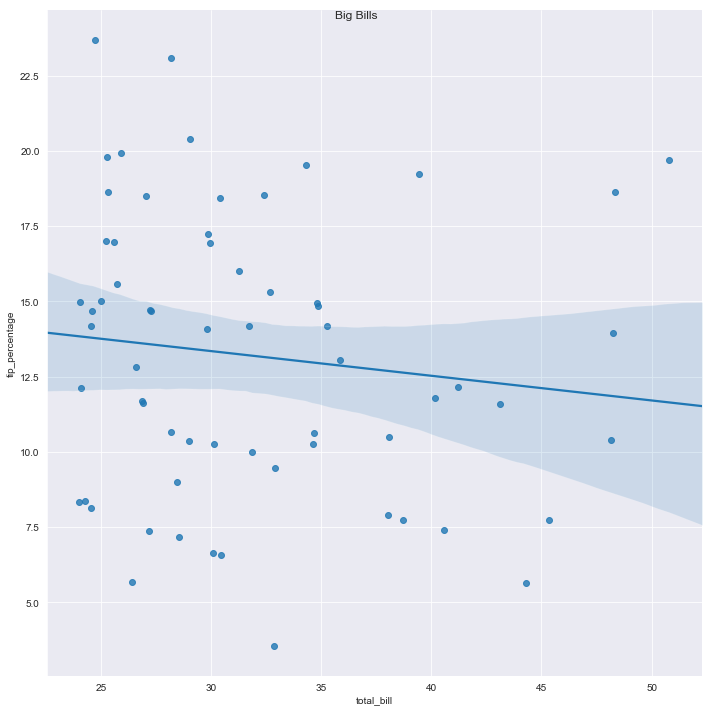

In [112]:
# Plot lmplot to see correlation between total_bill and tip_percentage for "bigbills"
c = sns.lmplot(x="total_bill", y="tip_percentage", data=bigbills, size=10)
c.fig.suptitle("Big Bills");

The strongest negative correlation can be seen in the <em>lowbills</em> group. A slightly less strong, but still clear, correlation can be seen for <em>bigbills</em> and a weak negative correlation is seen in the lmplot for <em>avgbills</em>.

In [36]:
lowbills.describe()

,total_bill,tip,size,tip_percentage
count,40.000000,40.000000,40.00000,40.000000
mean,9.640250,1.859000,1.95000,19.933369
std,1.799341,0.790225,0.38895,10.141039
min,3.070000,1.000000,1.00000,11.893435
25%,8.565000,1.465000,2.00000,15.059585
50%,10.180000,1.665000,2.00000,17.631927
75%,10.680000,2.000000,2.00000,19.775761
max,11.870000,5.150000,3.00000,71.034483


In [37]:
avgbills.describe()

,total_bill,tip,size,tip_percentage
count,140.000000,140.000000,140.000000,140.000000
mean,17.125714,2.787214,2.335714,16.302791
std,3.199846,0.903971,0.652728,4.276288
min,12.020000,1.000000,2.000000,5.944673
25%,14.437500,2.000000,2.000000,13.736573
50%,16.875000,2.745000,2.000000,15.768761
75%,19.780000,3.280000,2.000000,19.503614
max,23.950000,6.500000,5.000000,28.053517


In [38]:
bigbills.describe()

,total_bill,tip,size,tip_percentage
count,64.000000,64.000000,64.000000,64.000000
mean,31.946250,4.172031,3.468750,13.185274
std,7.056394,1.694743,1.126432,4.669469
min,24.010000,1.170000,2.000000,3.563814
25%,26.545000,3.000000,2.750000,9.851448
50%,29.995000,4.000000,4.000000,13.488089
75%,34.937500,5.000000,4.000000,16.949558
max,50.810000,10.000000,6.000000,23.674626


What can be seen from above arrays is that the mean tip percentage gets lower, as the bills get higher. For **lowbills** the mean tip percentage is 18.6%, for **avgbills** 16.7%, and for **bigbills** this percentage is 14.2%.

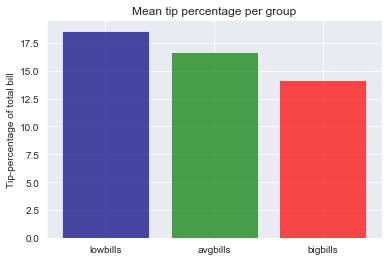

In [39]:
# Plot a bar plot. Bar plots are very useful when visualizing categorical data.
# Set the objects on the x-axis
difbills = ("lowbills", "avgbills", "bigbills") # Learned how to plot bar charts here: https://pythonspot.com/matplotlib-bar-chart/
# Set the values for the difbills
meantippct = [18.6, 16.7, 14.2]
# Set highest value of y-axis same as highest value of the difbills
y = np.arange(len(difbills))

# plot a bar plot and choose color strength (0-1) and which colors to use
plt.bar(y,meantippct, alpha=0.7, color=("navy", "green", "red"))
plt.xticks(y, difbills)
# Label the y axis and give plot a title.
plt.ylabel('Tip-percentage of total bill')
plt.title("Mean tip percentage per group")

plt.show()

In above bar chart is clearly visible the small, but existing, negative correlation between the size of the bill and the tip percentage.

## Part 3: Analysis of relationships between other variables within the dataset

In this section I am going to have a look at some other potentially interesting correlations in the <em>tips</em> dataset.

### 3.1 Pairplots for a quick overview

Before I start looking at the correlations between the variables in detail, I am going to use the pairplot function that is built into the <em> seaborn</em> package. This uses will give us a quick overview of any possibly interesting correlations. This will only plot the numeric variables though, so I will add another variable by using different colours. I am not a big fan of adding multiple variables by also changing the shape of the dots, so I will instead add the non-numeric variables one by one.

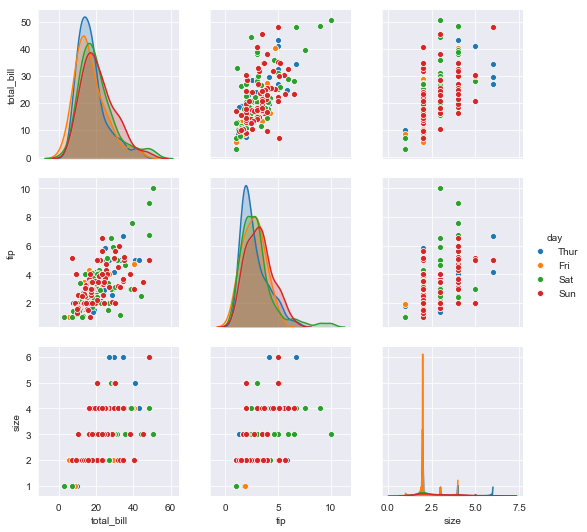

In [40]:
# Plot a pairplot showing the relationships between numeric variables in a dataset. 
# By using colors and shapes other variables can also be visualized.
# Using different shapes is not very clear, as the human eye is much more sensitive to color than it is to shape.
# Therefore I have only used color. 
# In this pairplot I have used different colors for every day.
sns.pairplot(tips, hue = "day"); # Learned more about pairplots here: https://seaborn.pydata.org/generated/seaborn.pairplot.html

First we are looking at the correlation between the variables **day** and the numeric variables **size**, **tip** and **total_bill**. No real surprises here. We already knew that there was a positive correlation between total bill and tip, and the fact that a bigger size party makes for a higher bill and therefore tip also can't be called surprising. The highest tips seem to have been given on Saturdays though, so this might be interesting to look into later.

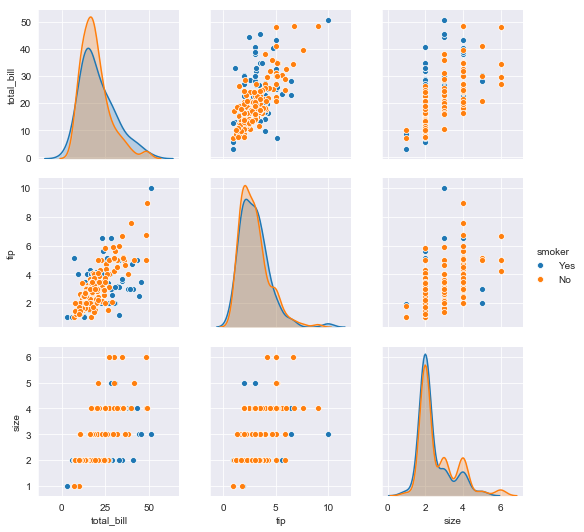

In [41]:
# Plot a pairplot with different colors for smokers and non-smokers.
sns.pairplot(tips, hue = "smoker");

Now we are looking at the correlation between being a smoker and the numeric variables. At first sight nothing stands out for me here. It looks like smokers might, on average, have slightly higher bills, but it's hard to see for sure. We will have to find out later when looking at the exact figures.


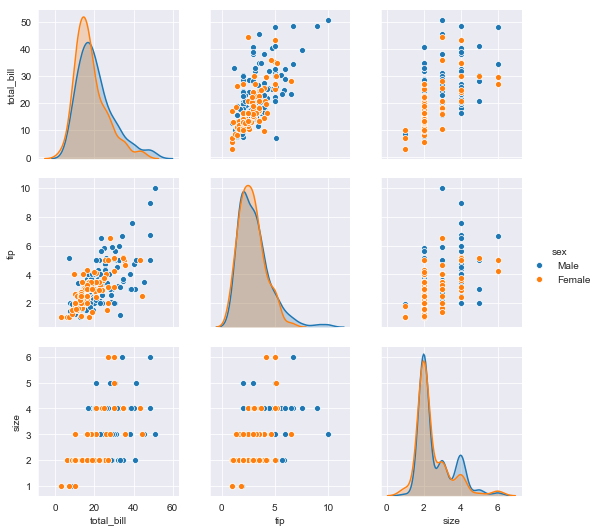

In [42]:
# Plot a pairplot with different colors for males and females.
sns.pairplot(tips, hue = "sex");

Above pairplot shows us the correlation between the sex of the person who paid the bill, and the <em>total bill</em>, <em>the tip</em> and the <em>size</em> of the party. First thing to notice is that there are many more men settling the bill than there are women. This could be a case of men being gentlemen, or maybe the restaurant in general attracts more males. Impossible to say without further data. What can be seen is that nearly all big tips are being paid by men. So it would seem that in this dataset men are more generous. This is definitely something I will look into more later.

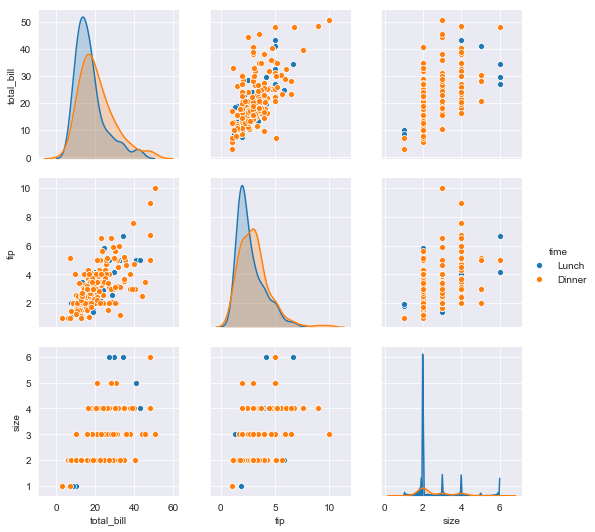

In [43]:
# Plot a pairplot with different colors for time of the day.
sns.pairplot(tips, hue = "time");

At first sight it looks like there were higher bills and higher tips at dinnertime. However, there also were much more dinners than lunches in general, so this might be deceiving. This will also have to be investigated in more detail before any conclusions can be drawn.

### 3.2 Correlation between time and (relative) tip size

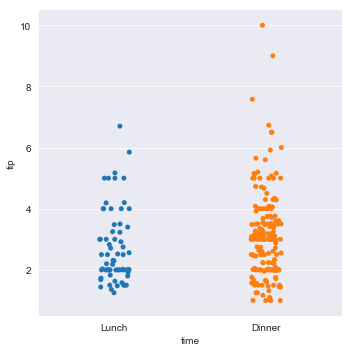

In [44]:
# Plot a catplot, which is handy for categorical data.
tips = sns.load_dataset("tips")
sns.catplot(x="time", y="tip", data=tips); # Learned more about the catplot here: https://seaborn.pydata.org/tutorial/categorical.html

Looking at above plots, it seems the tips at dinner time are higher than those at lunch. However, there also were far more dinners recorded in this dataset. Next, I want to have look at the tip percentage for every total bill, and then I am going to look at the average tip and after that also the average relative tip (in percentage of the total bill).

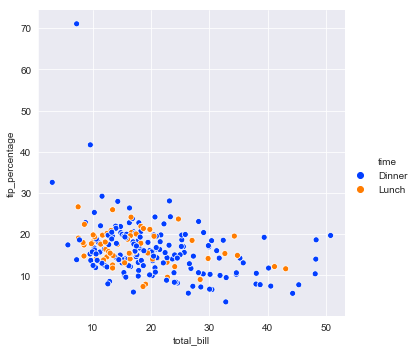

In [45]:
# Plot a relplot with tip percentage for lunch and dinner
sns.relplot(x="total_bill", y="tip_percentage", hue="time", data=billtip, palette = "bright");

In [46]:
# Seperate the rows by time of day: "Lunch" or "Dinner", by using the .loc function.
lunchtip = billtip.loc[(billtip["time"]=="Lunch")] # https://www.geeksforgeeks.org/python-pandas-extracting-rows-using-loc/ and https://stackoverflow.com/questions/22546425/how-to-implement-a-boolean-search-with-multiple-columns-in-pandas
dinnertip = billtip.loc[(billtip["time"]=="Dinner")]

In [47]:
# Show the mean values of all lunches
lunchtip.mean()

total_bill        17.168676
tip                2.728088
size               2.411765
tip_percentage    16.412793
dtype: float64

In [48]:
# Show the mean values of all dinners
dinnertip.mean()

total_bill        20.797159
tip                3.102670
size               2.630682
tip_percentage    15.951779
dtype: float64

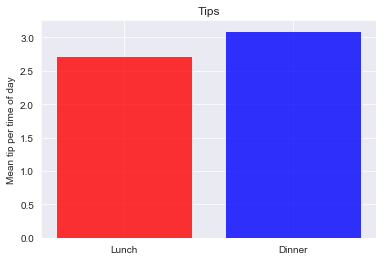

In [49]:
# Plot a bar plot to see the difference in mean tip between lunch and dinner
# # Set the objects on the x-axis
timeofday = ("Lunch", "Dinner")
# Set the values for the timeofday
meantip = [2.72, 3.1]
# Set highest value of y-axis same as highest value of the timeofday
y = np.arange(len(timeofday))
# plot a bar plot and choose color strength (0-1) and which colors to use
plt.bar(y,meantip, align='center', alpha=0.8, color=("red", "blue"))
plt.xticks(y, timeofday)
# Label the y axis and give plot a title
plt.ylabel('Mean tip per time of day')
plt.title("Tips")

plt.show()

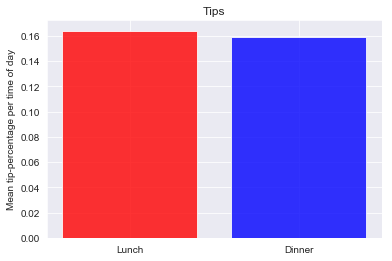

In [50]:
# Plot a bar plot to show the difference in tip_percentage between lunch and dinner
# Set the objects on the x-axis
timeofday = ("Lunch", "Dinner")
# Set the values for the timeofday
meantippct = [0.164128, 0.159518]
# Set highest value of y-axis same as highest value of the timeofday
yheight = np.arange(len(timeofday))
# plot a bar plot and choose color strength (0-1) and which colors to use
plt.bar(yheight,meantippct, align='center', alpha=0.8, color=("red", "blue"))
plt.xticks(yheight, timeofday)
# Label the y axis and give plot a title
plt.ylabel('Mean tip-percentage per time of day')
plt.title("Tips")

plt.show()

We can see that tips are generally higher at dinner time, but this can be explained by the bills, which are also higher.
In fact, the relative tip size is slightly higher at lunch.

### 3.3 Correlation between day of the week, time of day and (relative) tip size

I would like to know if there is a correlation between the day of the week and the size of the tip. Are people more generous in the weekend? And if so, why could that be? Let's find out.

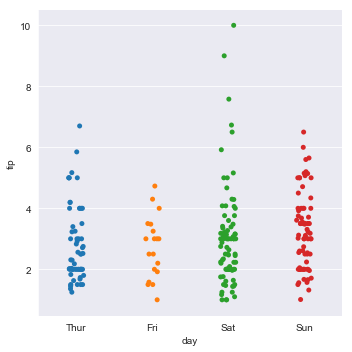

In [113]:
tips = sns.load_dataset("tips") # Plot a catplot, which is handy for categorical data.
sns.catplot(x="day", y="tip", data=tips); # https://seaborn.pydata.org/tutorial/categorical.html

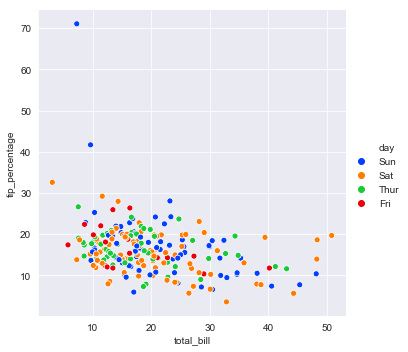

In [52]:
# Plot a relplot with tip percentage per day
sns.relplot(x="total_bill", y="tip_percentage", hue="day", data=billtip, palette = "bright");

At first sight it looks like Saturday and Sunday are the days for high tips. Let's have a look at the average tip for every day seperately.

First I am going to divide the dataset in 4, making a subset for every day of the week.

In [53]:
Thur = billtip.loc[(billtip["day"]=="Thur")] # https://www.geeksforgeeks.org/python-pandas-extracting-rows-using-loc/ and https://stackoverflow.com/questions/22546425/how-to-implement-a-boolean-search-with-multiple-columns-in-pandas
Fri = billtip.loc[(billtip["day"]=="Fri")]
Sat = billtip.loc[(billtip["day"]=="Sat")]
Sun = billtip.loc[(billtip["day"]=="Sun")]

In [54]:
Thur.mean()

total_bill        17.682742
tip                2.771452
size               2.451613
tip_percentage    16.127563
dtype: float64

In [55]:
Fri.mean()

total_bill        17.151579
tip                2.734737
size               2.105263
tip_percentage    16.991303
dtype: float64

In [56]:
Sat.mean()

total_bill        20.441379
tip                2.993103
size               2.517241
tip_percentage    15.315172
dtype: float64

In [57]:
Sun.mean()

total_bill        21.410000
tip                3.255132
size               2.842105
tip_percentage    16.689729
dtype: float64

I will visualize the average tip per day with a bar chart:

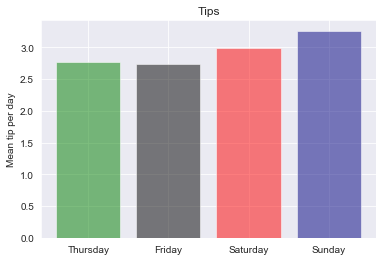

In [58]:
# Plot a bar plot to show the mean tip for every day.
# # Set the objects on the x-axis
days = ("Thursday", "Friday", "Saturday", "Sunday")
# Set the values for "days"
meantip = [2.77, 2.73, 2.99, 3.26]
# Set highest value of y-axis same as highest value of "days"
y = np.arange(len(days))
# plot a bar plot and choose color strength (0-1) and which colors to use
plt.bar(y,meantip, align='center', alpha=0.5, color=("green", "black", "red", "navy"))
plt.xticks(y, days)
# Label the y axis and give plot a title
plt.ylabel('Mean tip per day')
plt.title("Tips")

plt.show()

Now we know that the average tips are highest on Saturday and Sunday. But what about the tip size relative to the <em>total_bill</em>? I am going to us the variable <em> tip_percentage</em> to visualize this.

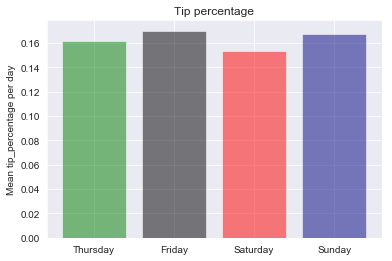

In [59]:
# Plot a bar plot to show the mean tip_percentage for every day
# Set the objects on the x-axis
days = ("Thursday", "Friday", "Saturday", "Sunday") # https://pythonspot.com/matplotlib-bar-chart/
# Set the values for the “days”
meantippct = [0.161276, 0.169913, 0.153152, 0.166897]
# Set highest value of y-axis same as highest value of “days”
y = np.arange(len(days))

# plot a bar plot and choose color strength (0-1) and which colors to use
plt.bar(y,meantippct, align='center', alpha=0.5, color=("green", "black", "red", "navy"))
plt.xticks(y, days)
# Label the y axis and give plot a title
plt.ylabel('Mean tip_percentage per day')
plt.title("Tip percentage")

plt.show()




As can be seen in the above bar chart, there is very little difference between the days and the relative tip sizes. Mean tip percentage is slightly higher on Friday and Sunday, but all 4 days are close to the mean tip percentage for the whole dataset of 16.08%.

When I glanced over the dataset first, I noticed how little lunches were had in the weekend, and how many on Thursday.
Let's visualize this and see if this is something to look into further.

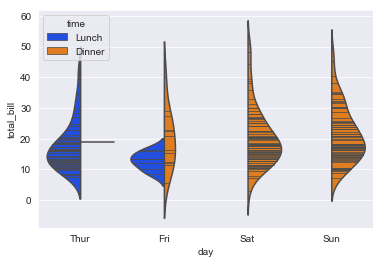

In [60]:
# Plot a violinplot to show relation between day, total bill and time
sns.violinplot(x="day", y="total_bill", hue="time", data=tips, palette="bright", split=True, inner="stick");

Indeed, there seem to only dinners on Thursday and no lunch at all in the weekend.
Let's look at the exact figures to make sure.

In [61]:
# Add up all total bills, tips and sizes per time and day of the week
tips.groupby(["time", "day"]).sum()

total_bill     tip   size
time   day                            
Lunch  Thur     1077.55  168.83  150.0
       Fri        89.92   16.68   14.0
       Sat          NaN     NaN    NaN
       Sun          NaN     NaN    NaN
Dinner Thur       18.78    3.00    2.0
       Fri       235.96   35.28   26.0
       Sat      1778.40  260.40  219.0
       Sun      1627.16  247.39  216.0

It seems there was 1 dinner on Thursday, and all the rest were lunches. In the weekend there are no lunches, as NaN (not a number) in the respective rows and columns tells us. This explains why the absolute tips were generally higher in the weekend, as the bills for dinners (and therefore also the average tip), are higher than the bills for lunch.

### 3.4 Correlation between size and (relative) tip size

In this section I will be looking at the variables <em> size </em> and <em> tip </em>. In the pairplot we could already see there was an (predictable) positive correlation between the size of the party and the tip size. However, I want to look into it a little bit more and see if the relative tip sizes are also correlated.

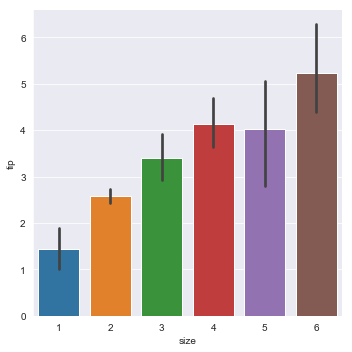

In [62]:
tips = sns.load_dataset("tips") # Plot a bar plot, which is handy for categorical data.
sns.catplot(x="size", y="tip", kind = "bar", data=tips); # https://seaborn.pydata.org/tutorial/categorical.html

In above bar plot it is clear to see the bigger the size, the bigger the mean tip. There is a small drop at parties of 5, but as we saw in chapter 1, there were only 5 instances of <em>size</em> 5, so hard to draw any real conclusions there. Let's have a look at those 5 times a party of 5 came to the restaurant and see if we can explain why the mean tip is lower than for parties of 4.

In [63]:
# Select only the rows with size = 5 from the dataset.
data = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/tips.csv", index_col = "size")
data.loc[5] # https://www.geeksforgeeks.org/python-pandas-extracting-rows-using-loc/

,total_bill,tip,sex,smoker,day,time
size,,,,,,
5,41.19,5.00,Male,No,Thur,Lunch
5,29.85,5.14,Female,No,Sun,Dinner
5,20.69,5.00,Male,No,Sun,Dinner
5,30.46,2.00,Male,Yes,Sun,Dinner
5,28.15,3.00,Male,Yes,Sat,Dinner


It turns out one tight man only tipped 2 dollars and dragged the mean tip down significantly.

Now I am curious to see the correlation between the <em>size</em> and the tip size relative to the total bill.

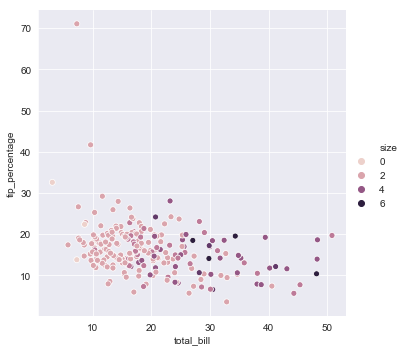

In [64]:
# Plot a relplot with tip percentage for every size
sns.relplot(x="total_bill", y="tip_percentage", hue="size", data=billtip);

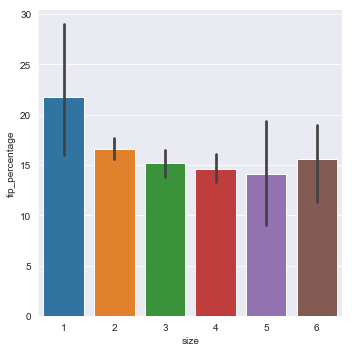

In [65]:
# Plot a bar plot
sns.catplot(x="size", y="tip_percentage", kind = "bar", data=billtip); # https://seaborn.pydata.org/tutorial/categorical.html

So while absolute tip size increases with the size of the party, the relative tip size does the opposite. Only at size 6 the tip percentage increases again, but we only had 4 parties of 6 people in this dataset, so again, this could be easily influenced by one generous tipper. Still interesting to note the steady decline, and this is also in line with our earlier finding that tips on higher bills usually are lower percentage wise.

### 3.5 Correlation between sex, time, size, total bill and (relative) tip size

First I want to see if there is any correlation between sex and day, when it comes to bills being paid.

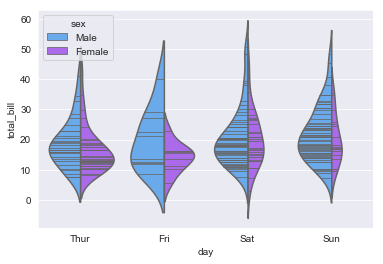

In [114]:
# Plot a violinplot. A violinplot shows the distribution of categorical data. 
# Instead of corresponding to actual data points, it features a kernel density estimation.
# Plot a violinplot to show relation between day, total bill and sex
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, palette="cool", split=True, scale="count", inner="stick");

Strikingly, men are more likely to pay the bill for every day of the week, except for Thursday, which looks pretty even. The difference with Sunday is especially noteworthy, as then men are much more likely to pay the bill. Perhaps Thursday is ladies day? Or could the fact that Thursday is a day for lunch, whereas there are only dinners in the weekend, play a part?

What about the tipping behaviour of the different sexes?

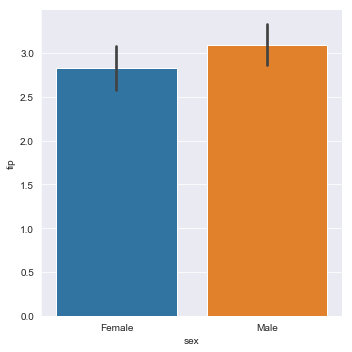

In [67]:
# Plot a bar plot comparing tips per sex
sns.catplot(x="sex", y="tip", kind = "bar", data=billtip); # https://seaborn.pydata.org/tutorial/categorical.html

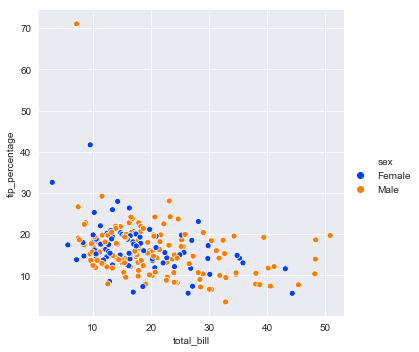

In [68]:
# Plot a relplot with tip percentage for males and females
sns.relplot(x="total_bill", y="tip_percentage", hue="sex", data=billtip, palette="bright");

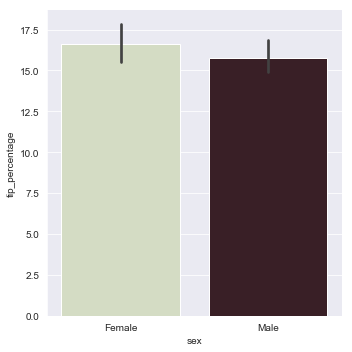

In [69]:
# Plot a bar plot comparing tip percentage per sex
sns.catplot(x="sex", y="tip_percentage", kind = "bar", palette="ch:.6", data=billtip);

It turns out male tippers give slightly higher tips in absolute terms, but female tippers give relatively higher tips.

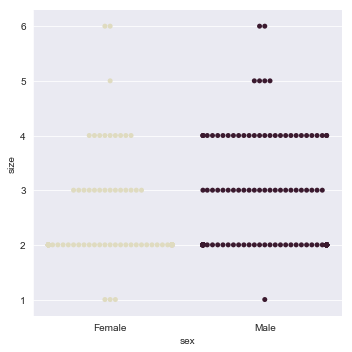

In [70]:
# Plot a swarm plot of relation between sex and size
sns.catplot(x="sex", y="size", kind = "swarm", palette="ch:3.4", data=billtip);

Women are clearly represented more in <em> size </em> 1 and 2, where the tips are lower, but higher in relative terms. Men are represented much more in the bigger party sizes, where tips are higher in absolute terms, but relatively lower. It would be interesting to see how <em>sex</em> compares for <em>tip</em> for every different <em>size</em>. This way we can find out if the variable <em>sex</em> plays a major part in tip size, or if the size of the party is more important. I will only look into size 2, 3 and 4, as there simply isn't enough data for the other sizes.

In [71]:
# Create 6 variables, which contain parties of sizes 2, 3 and 4 for both males and females.

male2 = billtip.loc[(billtip["sex"]=="Male") & (billtip["size"] == 2 )] # https://stackoverflow.com/questions/22546425/how-to-implement-a-boolean-search-with-multiple-columns-in-pandas
male3 = billtip.loc[(billtip["sex"]=="Male") & (billtip["size"] == 3 )]
male4 = billtip.loc[(billtip["sex"]=="Male") & (billtip["size"] == 4 )]
female2 = billtip.loc[(billtip["sex"]=="Female") & (billtip["size"] == 2 )]
female3 = billtip.loc[(billtip["sex"]=="Female") & (billtip["size"] == 3 )]
female4 = billtip.loc[(billtip["sex"]=="Female") & (billtip["size"] == 4 )]

In [72]:
# Show mean data for variable male2
male2.mean()

total_bill        17.104082
tip                2.614184
size               2.000000
tip_percentage    16.269448
dtype: float64

In [73]:
male3.mean()

total_bill        24.287083
tip                3.476667
size               3.000000
tip_percentage    14.764085
dtype: float64

In [74]:
male4.mean()

total_bill        28.078214
tip                4.172143
size               4.000000
tip_percentage    15.019654
dtype: float64

In [75]:
female2.mean()

total_bill        15.339483
tip                2.528448
size               2.000000
tip_percentage    17.082992
dtype: float64

In [76]:
female3.mean()

total_bill        21.547143
tip                3.250000
size               3.000000
tip_percentage    15.989858
dtype: float64

In [77]:
female4.mean()

total_bill        30.278889
tip                4.021111
size               4.000000
tip_percentage    13.273446
dtype: float64

By dividing the mean <em>tip</em> by the mean <em> total_bill</em> we can see the tip percentageI am going to use a <em>grouped bar chart</em> to visualise this: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html

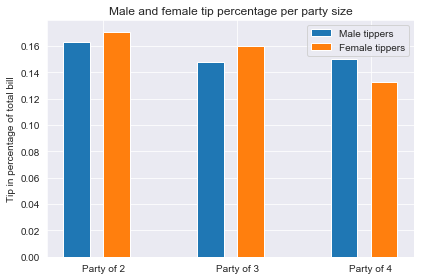

In [78]:
# Plot a grouped bar plot with relation between size, sex and tip percentage. With 2 bars for every size, one per gender.

# Label the x-axis
labels = ["Party of 2", "Party of 3", "Party of 4"]
# Set values for maletippct
maletippct = [0.162694, 0.147641, 0.150197]
# Set values for femaletippct
femaletippct = [0.170830, 0.159899, 0.132734]

# Location of the labels x-axis
x = np.arange(len(labels))
# Width of bars
width = 0.2
# Create a subplot
fig, ax = plt.subplots()

# Create layout for grouped bar plot
ax.bar(x - width, maletippct, width, label="Male tippers")
ax.bar(x + width/2, femaletippct, width, label="Female tippers")

# Add labels, title and legend
ax.set_ylabel("Tip in percentage of total bill")
ax.set_title("Male and female tip percentage per party size")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Automatically adjust subplot params so it fits into figure area
fig.tight_layout()

First thing to note is that the difference in relative tip sizes between the sexes is minimal and therefore it is hard to draw any real conclusions here. But looking at above chart we can see female tippers appear to tip relatively better when paying for parties of 2 and 3 than their male counterparts. However when a male is paying for 4 (possible his family), he is relatively more generous than females.

Earlier we noticed that the average bill is higher at dinner than at lunch, so could it be that women are having more lunch and therefore lower bills? Let's find out.

In [79]:
# Select only the rows where males have paid for lunch, and do the same for the 3 other sex-time combinations

malelunch = billtip.loc[(billtip["sex"]=="Male") & (billtip["time"] == "Lunch" )]
femalelunch = billtip.loc[(billtip["sex"]=="Female") & (billtip["time"] == "Lunch" )]
maledinner = billtip.loc[(billtip["sex"]=="Male") & (billtip["time"] == "Dinner" )]
femaledinner = billtip.loc[(billtip["sex"]=="Female") & (billtip["time"] == "Dinner" )]

In [80]:
malelunch.describe()

,total_bill,tip,size,tip_percentage
count,33.000000,33.000000,33.000000,33.000000
mean,18.048485,2.882121,2.363636,16.608263
std,7.953435,1.329017,0.994302,4.572727
min,7.510000,1.440000,1.000000,7.861635
25%,13.030000,2.000000,2.000000,13.049096
50%,16.580000,2.310000,2.000000,15.673800
75%,21.160000,4.000000,2.000000,19.533528
max,41.190000,6.700000,6.000000,26.631158


In [81]:
femalelunch.describe()

,total_bill,tip,size,tip_percentage
count,35.000000,35.000000,35.000000,35.000000
mean,16.339143,2.582857,2.457143,16.228493
std,7.500803,1.075108,1.093910,3.487042
min,8.350000,1.250000,1.000000,7.296137
25%,12.065000,1.915000,2.000000,14.041645
50%,13.420000,2.010000,2.000000,15.384615
75%,17.865000,3.115000,2.000000,18.628878
max,43.110000,5.170000,6.000000,25.931446


In [82]:
maledinner.describe()

,total_bill,tip,size,tip_percentage
count,124.000000,124.000000,124.000000,124.000000
mean,21.461452,3.144839,2.701613,15.540653
std,9.460974,1.529116,0.936868,6.894801
min,7.250000,1.000000,2.000000,3.563814
25%,14.705000,2.000000,2.000000,11.733003
50%,19.630000,3.000000,2.000000,15.095887
75%,25.642500,3.722500,3.000000,18.445419
max,50.810000,10.000000,6.000000,71.034483


In [83]:
femaledinner.describe()

,total_bill,tip,size,tip_percentage
count,52.000000,52.000000,52.000000,52.000000
mean,19.213077,3.002115,2.461538,16.932157
std,8.202085,1.193483,0.827506,6.339870
min,3.070000,1.000000,1.000000,5.643341
25%,14.080000,2.230000,2.000000,14.053856
50%,17.190000,3.000000,2.000000,16.070473
75%,24.692500,3.527500,3.000000,19.503614
max,44.300000,6.500000,5.000000,41.666667


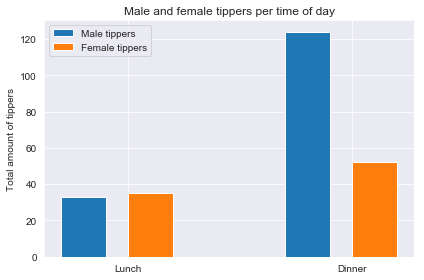

In [84]:
# Plot a grouped bar plot

# label the x-axis
labels = ["Lunch", "Dinner"]
# set values for maletippct
maletippct = [33, 124]
# set values for female tippct
femaletippct = [35, 52]

# Location of labels x-axis
x = np.arange(len(labels))
# width of bars
width = 0.2
# create a subplot
fig, ax = plt.subplots()
# create lay-out for grouped bar plot
ax.bar(x - width, maletippct, width, label="Male tippers")
ax.bar(x + width/2, femaletippct, width, label="Female tippers")

# Add labels, title and legend
ax.set_ylabel("Total amount of tippers")
ax.set_title("Male and female tippers per time of day")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Automatically adjust subplot params so it fits into figure area
fig.tight_layout()

Indeed we can see women are relatively more likely to pay for lunch, while men are more likely to pay for dinner. Since dinner is generally more expensive than lunch, this could explain why men, on average, pay higher bills than women. Still it does not describe the difference completely as the average bill is still lower for women, even when adjusted for time of day. This plot also largely explains why women are more likely to pay the bill on Thursdays, when compared to the weekend. Women, it turns out, pay relatively more lunches, and men more dinners. Thursday is the main day for lunch and the weekends only dinner is served.

### 3.6 Correlation between smoking, total bill and (relative) tip size

This time I want to have a closer look at the relation between the variables <em> smoker</em>, <em>total_bill</em> and <em>tip</em> .
First let's have a look at the effect of smoking on the correlation between total bill and the absolute tip size.

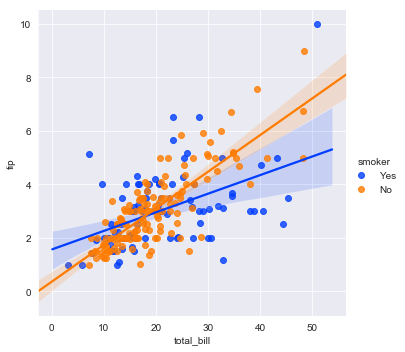

In [85]:
# plot lmplot with relation between total bill, tip and smoker
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, palette = "bright" );

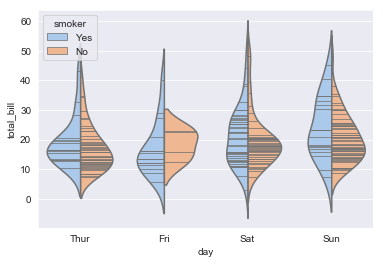

In [86]:
# Plot a violinplot to show relation between day, total bill and smoker
sns.violinplot(x="day", y="total_bill", hue="smoker", data=tips, palette="pastel", split=True, inner="stick");

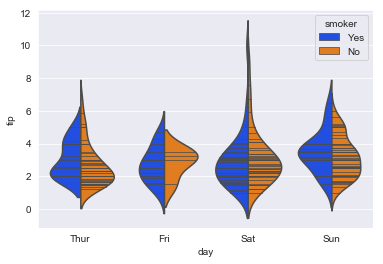

In [87]:
# Plot a violinplot to show relation between day, tip and smoker
sns.violinplot(x="day", y="tip", hue="smoker", data=tips, palette="bright", split=True, inner="stick");

Smoking seems to have little effect on the correlation between <em>total_bill</em> and <em>tip</em>. Smokers seem to have higher bills than non smokers on Saturdays, however, the tips seem the same or lower. On the other 3 days the effect of smoking on the total bill and tip correlation seems very small.
I will now use a catplot to visualize the direct effect of smoking on the tip.

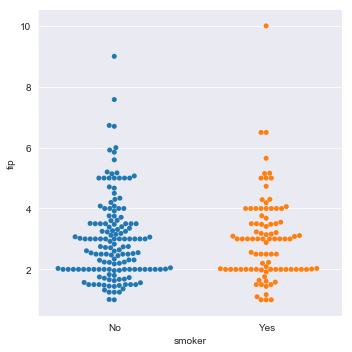

In [88]:
# Plot a swarm plot to show all tips smokers and non-smoker have given
sns.catplot(x="smoker", y="tip", kind="swarm", order=["No", "Yes"], data=tips);

At first sight there appears to be little difference in tip sizes between smokers and non-smokers. What about the tip_percentage?

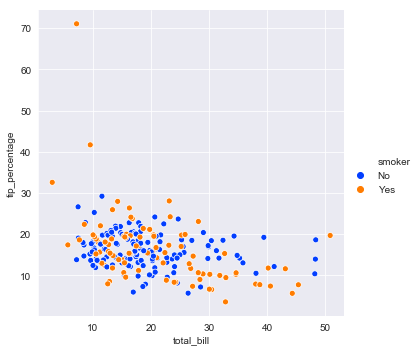

In [89]:
# Plot a relplot with tip percentage for smokers and non-smokers
sns.relplot(x="total_bill", y="tip_percentage", hue="smoker", data=billtip, palette="bright");

We can see the 3 highest tips (percentage wise) in the dataset, were all given by smokers. However, on the whole, there doesn't seem to be a whole lot of difference between smokers and non-smokers. Maybe if we calculate and visualize the average tip size, we will find something interesting.

In [90]:
# create 2 variables, with all values of either smoking or non-smoking tippers, using .loc function
smokingtipper = billtip.loc[(billtip["smoker"]=="Yes")]
nonsmokingtipper = billtip.loc[(billtip["smoker"]=="No")]

In [91]:
smokingtipper.mean()

total_bill        20.756344
tip                3.008710
size               2.408602
tip_percentage    16.319604
dtype: float64

In [92]:
nonsmokingtipper.mean()

total_bill        19.188278
tip                2.991854
size               2.668874
tip_percentage    15.932846
dtype: float64

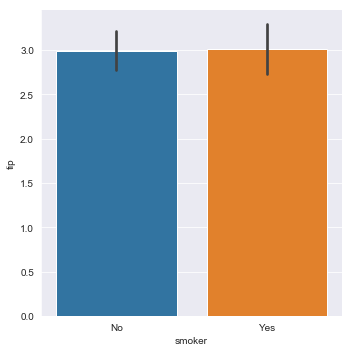

In [93]:
# Show a bar plot with relation of smoking to tipping
sns.catplot(x="smoker", y="tip", kind = "bar", data=billtip);

As you can see, the amount tipped is almost identical between smoking and non-smoking customers.

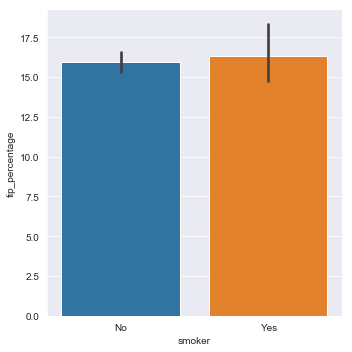

In [94]:
# Show a bar plot to show relationship between smoking and tip percentage
sns.catplot(x="smoker", y="tip_percentage", kind = "bar", data=billtip);

Tips from smokers are relatively higher than non-smokers, however the difference is small (16.3 vs 15.9 %).

### 3.7 Multiple variables combined: day, total bill, sex and tip

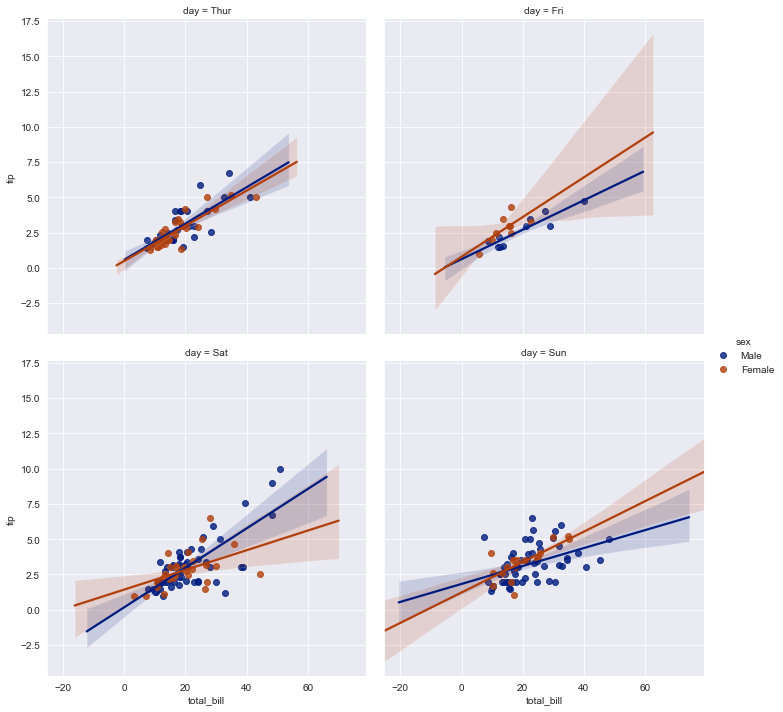

In [95]:
# Plot lmplots for every day of the week, which show the relation between total bill, sex and tip, by using different colors for sex
sns.lmplot(x="total_bill",y="tip", data= tips, col="day", col_wrap=2, hue="sex", palette="dark");

Again a clear correlation between <em>total_bill</em> and tip can be seen. Also interesting to see is the fact that female tippers give relatively bigger tips for bigger bills on Friday and Sunday, but Saturday seems to be the day when the male tippers are trying to impress and give big tips for big bills. Something else that catches my eye is the high number of orange dots on Thursday, and low number of orange dots on Sunday. As we saw earlier, women are much more likely to pay the bill on Thursday(nearly only lunches served), as they are on Sundays (no lunches served).

### 3.8 Multiple variables combined: Smoker, sex, time and size

I want to go a little bit outside the box here, and find out if smoking and/or sex have an effect on the size of the party. Perhaps smokers generally eat in smaller parties, as there are less smokers than non-smokers, and non-smokers might want to be far away from the smokers. And perhaps there is a difference between male and female smokers? Let's find out.

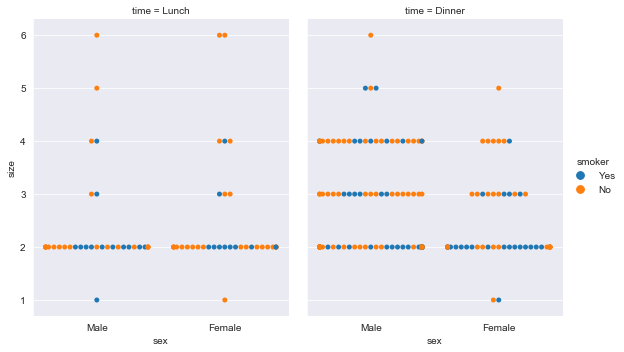

In [96]:
# Plot 2 swarmplot for lunch and dinner,  to show relationship between sex, smoking and size
sns.catplot(x="sex", y="size", hue="smoker",
            col="time", aspect=.8,
            kind="swarm", data=tips); # create a different plot per column 'time', and the aspect variable determines the width of figure.
# I used this site to learn more about plotting 2 swarmplot side by side: https://seaborn.pydata.org/tutorial/categorical.html

Already we can see a trend where the largest parties are generally non-smoking.  

In [97]:
# Divide dataset by sex and smoker using the .loc function
malesmoker = billtip.loc[(billtip["sex"]=="Male") & (billtip["smoker"] == "Yes" )]
femalesmoker = billtip.loc[(billtip["sex"]=="Female") & (billtip["smoker"] == "Yes" )]
malenonsmoker = billtip.loc[(billtip["sex"]=="Male") & (billtip["smoker"] == "No" )]
femalenonsmoker = billtip.loc[(billtip["sex"]=="Female") & (billtip["smoker"] == "No" )]

In [98]:
malesmoker.describe()

,total_bill,tip,size,tip_percentage
count,60.000000,60.000000,60.00000,60.000000
mean,22.284500,3.051167,2.50000,15.277118
std,9.911845,1.500120,0.89253,9.058794
min,7.250000,1.000000,1.00000,3.563814
25%,15.272500,2.000000,2.00000,10.184496
50%,20.390000,3.000000,2.00000,14.101483
75%,28.572500,3.820000,3.00000,19.169707
max,50.810000,10.000000,5.00000,71.034483


In [99]:
femalesmoker.describe()

,total_bill,tip,size,tip_percentage
count,33.000000,33.000000,33.000000,33.000000
mean,17.977879,2.931515,2.242424,18.215035
std,9.189751,1.219916,0.613917,7.159451
min,3.070000,1.000000,1.000000,5.643341
25%,12.760000,2.000000,2.000000,15.243902
50%,16.270000,2.880000,2.000000,17.391304
75%,22.120000,3.500000,2.000000,19.821606
max,44.300000,6.500000,4.000000,41.666667


In [100]:
malenonsmoker.describe()

,total_bill,tip,size,tip_percentage
count,97.000000,97.000000,97.000000,97.000000
mean,19.791237,3.113402,2.711340,16.066872
std,8.726566,1.489559,0.989094,4.184875
min,7.510000,1.250000,2.000000,7.180385
25%,13.810000,2.000000,2.000000,13.181019
50%,18.240000,2.740000,2.000000,15.760441
75%,22.820000,3.710000,3.000000,18.621974
max,48.330000,9.000000,6.000000,29.198966


In [101]:
femalenonsmoker.describe()

,total_bill,tip,size,tip_percentage
count,54.000000,54.000000,54.000000,54.000000
mean,18.105185,2.773519,2.592593,15.692097
std,7.286455,1.128425,1.073146,3.642118
min,7.250000,1.000000,1.000000,5.679667
25%,12.650000,2.000000,2.000000,13.970835
50%,16.690000,2.680000,2.000000,14.969118
75%,20.862500,3.437500,3.000000,18.162966
max,35.830000,5.200000,6.000000,25.267250


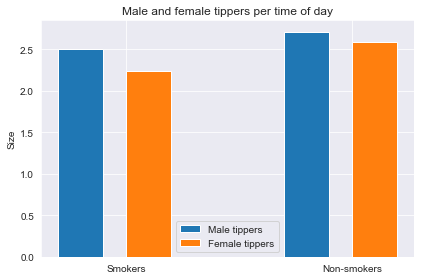

In [102]:
# Plot a grouped bar plot

# label x-axis
labels = ["Smokers", "Non-smokers"]
# set values for smokersize (taken from data in .describe above)
smokersize = [2.5, 2.711340]
# set values for nonsmokersize
nonsmokersize = [2.242424, 2.592593]

# Location of the labels x-axis
x = np.arange(len(labels))
# width of bars
width = 0.2
# Create a subplot
fig, ax = plt.subplots()

# Create lay-out for grouped bar plot
ax.bar(x - width, smokersize, width, label="Male tippers")
ax.bar(x + width/2, nonsmokersize, width, label="Female tippers")

# Add labels, title and legend
ax.set_ylabel("Size")
ax.set_title("Male and female tippers per time of day")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Automatically adjust subplot params so it fits into figure area
fig.tight_layout()

Of course it's not possible to say there is a causal relation between smoking and size, but non-smokers in this restaurant generally eat in bigger size parties than smokers.

## 3.9 Conclusions

A few things stand out after investigating this data set:
- Obviously the <em>total bill</em> and <em>tip</em> size have a very strong correlation. But more interesting was the negative correlation between total bill and the tip percentage.  
- Women, apparently, are far more likely to pay for lunch than their male counterparts, and therefore are more likely to pay the bill during the week (no lunch served in the weekend).  
- When looking at tip percentage, the ideal party size is 2 people. But this could have something to do with the fact that 2 people generally have lower bills, and lower bills have a higher tip percentage.  
- When it comes down to it, there is little difference in the tipping behaviour of men and women. So much for the old "generous gentleman" stereotype.

## References

- How to suppress warnings in Jupyter Notebook: https://exploredatalab.com/how-to-suppress-warnings-in-jupyter-notebook/
- How to count the occurences of a specific value using Pandas: https://stackoverflow.com/questions/35277075/python-pandas-counting-the-occurrences-of-a-specific-value
- How to plot a pie chart using matplotlib: https://pythonspot.com/matplotlib-pie-chart/
- How to count frequency of a value in a column: https://stackoverflow.com/questions/22391433/count-the-frequency-that-a-value-occurs-in-a-dataframe-column/36434248
- How to group data by certain values using Pandas: https://www.geeksforgeeks.org/pandas-groupby/
- How to plot a relplot with Seaborn: https://seaborn.pydata.org/generated/seaborn.relplot.html
- How to plot a lmplot using Seaborn: https://seaborn.pydata.org/generated/seaborn.lmplot.html
- How to generate polyfit using Numpy: https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html
- How to divide two columns in a dataframe: https://stackoverflow.com/questions/36619631/how-to-divide-two-column-in-a-dataframe
- How to select rows between 2 values using pandas: https://stackoverflow.com/questions/31617845/how-to-select-rows-in-a-dataframe-between-two-values-in-python-pandas/40442778
- How to add a title to Seaborn plot: https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot
- How to plot a bar chart using Matplotlib: https://pythonspot.com/matplotlib-bar-chart/
- How to plot a pairplot using Seaborn: https://seaborn.pydata.org/generated/seaborn.pairplot.html
- How to plot categorical data: https://seaborn.pydata.org/tutorial/categorical.html
- How to use Pandas' .loc function to extract rows https://www.geeksforgeeks.org/python-pandas-extracting-rows-using-loc/ 
- How to implement a boolean search with multiple columns using Pandas: https://stackoverflow.com/questions/22546425/how-to-implement-a-boolean-search-with-multiple-columns-in-pandas

Videolectures: 

- Videolecture Ian McLoughlin about best fit line: https://web.microsoftstream.com/video/021a0f49-a019-4119-a08c-7601a9a7d0b5
- Videolecture Ian McLoughlin about using Pandas to calculate descriptive statistics: https://web.microsoftstream.com/video/ecc9ce4a-c6f5-4c50-a4f4-29116fc21b81?referrer=https://learnonline.gmit.ie/course/view.php?id=689
- Videolecture Ian McLoughlin on different plot in Python: https://web.microsoftstream.com/video/99500835-4d08-428d-ad17-3cbc62a13550

Image:

- https://yourfriendlyneighborhoodbarista.files.wordpress.com/2010/12/tips.jpg